In [ ]:
import pandas as pd # For dataframes (tables)
import numpy as np # For arange
import matplotlib.pyplot as plt # For plots
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
import math # for sqrt
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
import pickle # to serialize/deserialize objects
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LogisticRegression

from statistics import mean
from sklearn.preprocessing import StandardScaler
import os
import sys
sys.path.append(os.path.abspath("../../modules"))

from visualization import plot_roc_curve, plot_precision_recall_curve, plot_conf_mat


 # To import from the course library
from andrea_models import AndreaLinearRegression # In the course library
import feature_engineering # From the course library
from imblearn.over_sampling import SMOTE

# Load the CSV file
csv_file = "../../data/diabetes_binary_health_indicators_BRFSS2015.csv"
data = pd.read_csv(csv_file, sep=',')

X = data.drop(columns=['Diabetes_binary'])
y = data['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print(data.head())

print(y_train.value_counts())


   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0   

In [34]:

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

print(y_train.value_counts())




Diabetes_binary
0.0    174595
1.0    174595
Name: count, dtype: int64


In [35]:
df_train = X_train.copy()
df_train['Diabetes_binary'] = y_train.values

df_test = X_test.copy()
df_test['Diabetes_binary'] = y_test.values

In [36]:
feats = feature_engineering.get_features_correlated_to_target(df_train, target_feature='Diabetes_binary')
feats



Diabetes_binary         1.00
GenHlth                 0.42
HighBP                  0.41
HighChol                0.31
BMI                     0.29
DiffWalk                0.28
Age                     0.28
Income                 -0.23
PhysHlth                0.21
HeartDiseaseorAttack    0.21
Education              -0.17
PhysActivity           -0.15
CholCheck               0.12
Stroke                  0.11
HvyAlcoholConsump      -0.11
Smoker                  0.09
MentHlth                0.09
Veggies                -0.06
Fruits                 -0.05
AnyHealthcare           0.04
Sex                     0.04
NoDocbcCost             0.03
Name: Diabetes_binary, dtype: float64

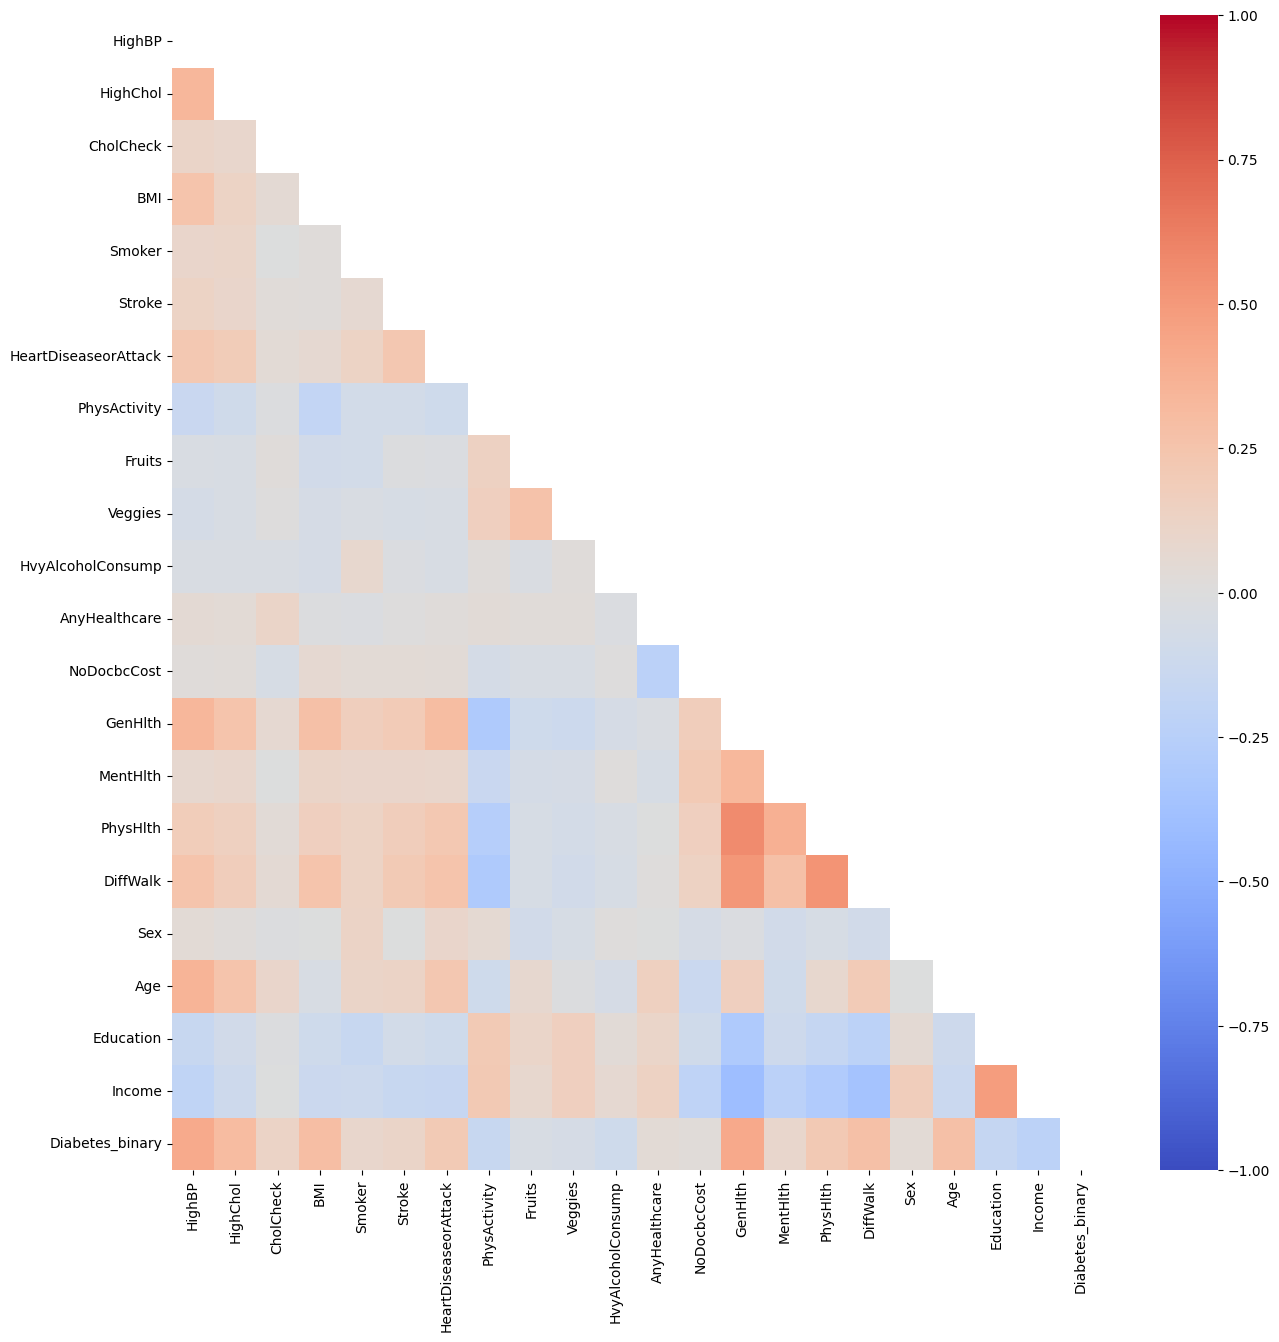

In [37]:
import visualization
visualization.plot_corr(df_train, width=15, height=15,print_value=False)

In [38]:
df_train = df_train.drop(columns=['PhysHlth', 'DiffWalk', 'Education'])
df_test = df_test.drop(columns=['PhysHlth', 'DiffWalk', 'Education'])
# sm = scatter_matrix(data[data.columns],
#                    figsize=(10,10))

# plt.show()


In [39]:
print(df_train['Diabetes_binary'].value_counts())

Diabetes_binary
0.0    174595
1.0    174595
Name: count, dtype: int64


In [40]:
non_constant_features = feature_engineering.low_var_features(df_train, threshold=0)
print(non_constant_features)
df_train = df_train[non_constant_features]
df_test = df_test[non_constant_features]

['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'Sex', 'Age', 'Income', 'Diabetes_binary']


In [41]:
X_train = df_train.drop(columns=['Diabetes_binary'])
y_train = df_train['Diabetes_binary']

X_test = df_test.drop(columns=['Diabetes_binary'])
y_test = df_test['Diabetes_binary']


model = LogisticRegression(C=1e-9)
model.fit(X_train, y_train)

LogisticRegression(C=1e-09)

Accuracy: 0.7157245348470515
Normalized confusion matrix
[[0.73705389 0.26294611]
 [0.41760755 0.58239245]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

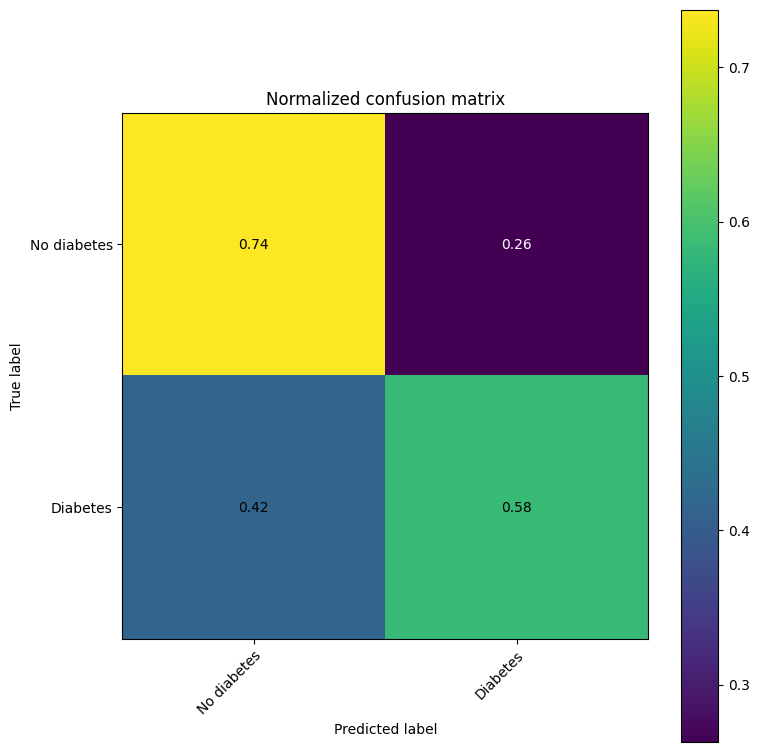

In [42]:
y_pred = model.predict(X_test)
y_pred
y_pred = y_pred.astype(int)
y_test = y_test.astype(int)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


class_names = np.array(["No diabetes", "Diabetes"])
plot_conf_mat(y_test, y_pred, class_names=class_names)

/home/laureal/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Accuracy: 0.8620900346893724
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

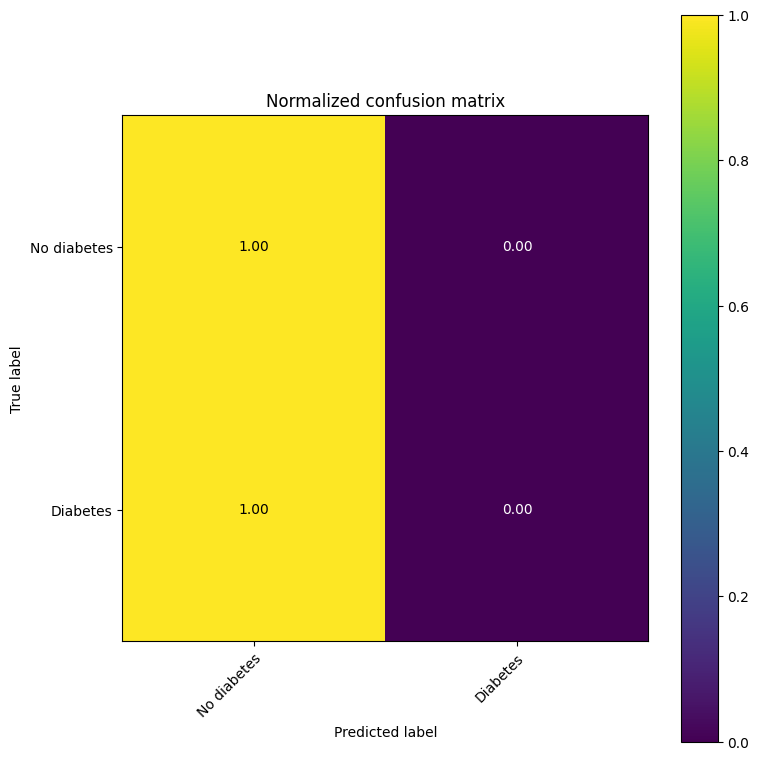

In [43]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

y_pred_scaled = model.predict(X_test_scaled)
y_pred_scaled
y_pred_scaled = y_pred_scaled.astype(int)

acc = accuracy_score(y_test, y_pred_scaled)
print("Accuracy:", acc)


class_names = np.array(["No diabetes", "Diabetes"])
plot_conf_mat(y_test, y_pred_scaled, class_names=class_names)

In [44]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=5)

parameters_to_test = [{ 'logisticregression__C': [1e-9, 1e-3, 0.01, 0.1, 1, 10, 100, 1000, 10000] }]

# The different scoring metrics available are in:
#     https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
grid = GridSearchCV(MyMultinomialRegression(), parameters_to_test, cv=k_fold,
                    scoring='f1_macro')

NameError: name 'GridSearchCV' is not defined